# Cloning quasars.
Let's look at the redshift distributions of the quasars in the Sloan Digital Sky Survey.

The Sloan Digital Sky Survey or SDSS is a major multi-spectral imaging and spectroscopic redshift survey using a dedicated 2.5-m wide-angle optical telescope at Apache Point Observatory in New Mexico, United States. Operations started in 1998.

In phase 1, SDSS has released photometry data 357 million (!!!) unique sources and 1.6 million spectra. In phase 2, SDSS observed the same patch of the sky many times ("time domain astronomy", and now we're going to have LSST!)

Download the SDSS quasar data:
- Upsample this distribution in hopefully two ways (but at least one of them), using both rejection sampling and inverse transform.
- Check, at least visually, that the two cloned distribitions are indeed similar to the observed one (for a quantitative check, come back to this point in a few lectures)
- Think about the cosmology of quasars. How do you think they are distributed? Overplot the theorethical distribution to the measured SDSS data. Does that agree with your expectation?

In [10]:
from astroML import stats as astroMLstats

def bins_num (X) :

    sigmaG2 = astroMLstats.sigmaG(X) # quantile at 75 - quantile at 25
    binsize = 2.7 * sigmaG2 / (len(X)**(1/3)) #Freedman-Diaconis
    N = (max(X) - min(X))/binsize

    return int(N+2)

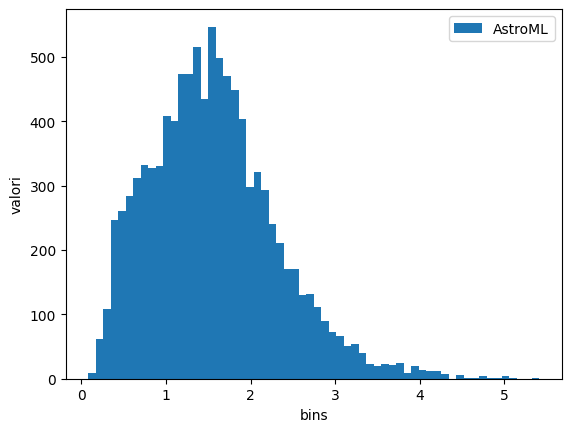

In [2]:
from astroML.datasets import fetch_dr7_quasar
import matplotlib.pyplot as plt
import numpy as np


# Fetch the quasar data
data = fetch_dr7_quasar()

# select the first 10000 points
N = 10000
data = data[:N]

z = data['redshift']


plt.hist(z, bins = bins_num(z), label = "AstroML")
plt.xlabel("bins")
plt.ylabel("valori")
plt.legend() 
plt.show()

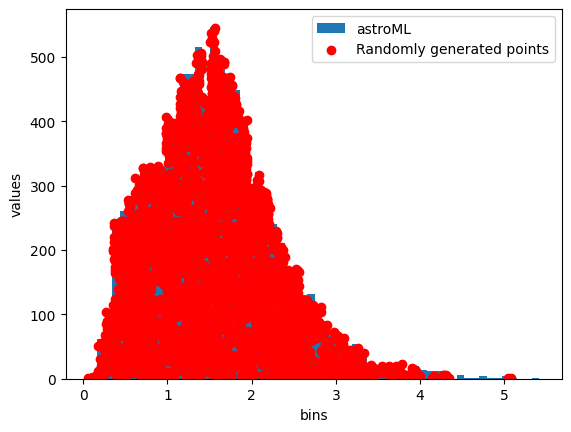

In [3]:
plt.hist(z, bins_num(z),label="astroML") # plot on which I overlay the generated points

values, bins = np.histogram(z, bins_num(z)) # extract parameters from the histogram, values contains the count of z elements falling in each bin, bins contains the bin edges

x = np.random.uniform(0, max(bins), N) # uniform generation
y = np.random.uniform(0, max(values), N)

x_filtered = []
y_filtered = []

for i in range(N):
        bin_index = np.digitize(x[i], bins) - 1  # finds the corresponding bin for x[i]
        if y[i] < values[bin_index]:  # takes the point if Y[i] is less than the histogram
            x_filtered.append(x[i])
            y_filtered.append(y[i])

plt.scatter(x_filtered, y_filtered, color='red', marker='o', label="Randomly generated points")  
plt.xlabel("bins")
plt.ylabel("values")
plt.legend() 
plt.show()


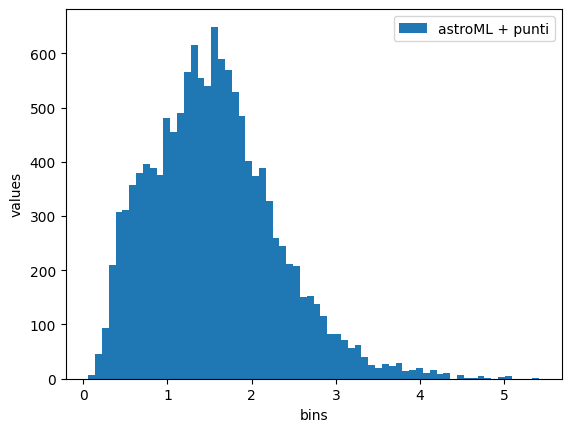

In [4]:
z_augmented = np.concatenate([z, x_filtered])

plt.hist(z_augmented, bins_num(z_augmented) , label = "astroML + punti" )
plt.xlabel("bins")
plt.ylabel("values")
plt.legend()
plt.show()


**Retrived the CDF**

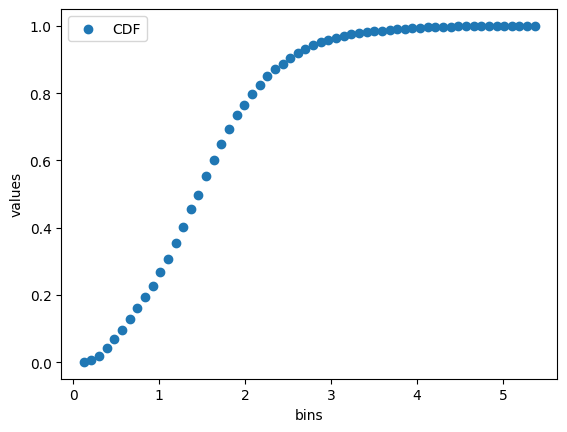

In [5]:
somma = np.sum(values) 
values = values / somma # normalization

cdf = np.cumsum(values) # magical Python functions

bin_center = ((bins[:-1] + bins[1:]) / 2)

plt.scatter(bin_center, cdf, label="CDF")
plt.xlabel("bins")
plt.ylabel("values")
plt.legend()
plt.show()


**Retrieve the quantile, i.e., the inverse of the CDF**


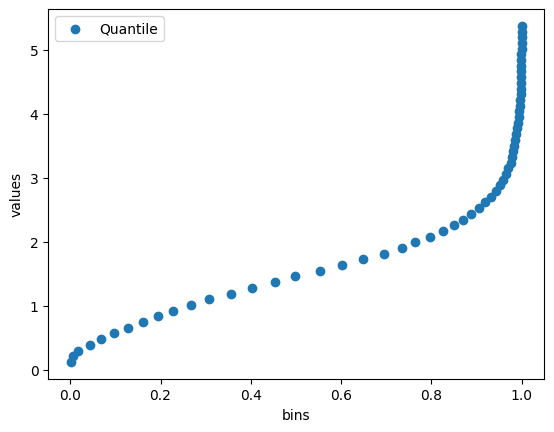

In [6]:
# I simply inverted x and y of the points --> the inverse is symmetric with respect to the bisector of the first/third quadrant for monotonically increasing functions
x_quantile = cdf
y_quantile = bin_center

plt.scatter(x_quantile, y_quantile, label="Quantile") 
plt.xlabel("bins")
plt.ylabel("values")
plt.legend()
plt.show()


**Generate uniform numbers in X --> inverse method**


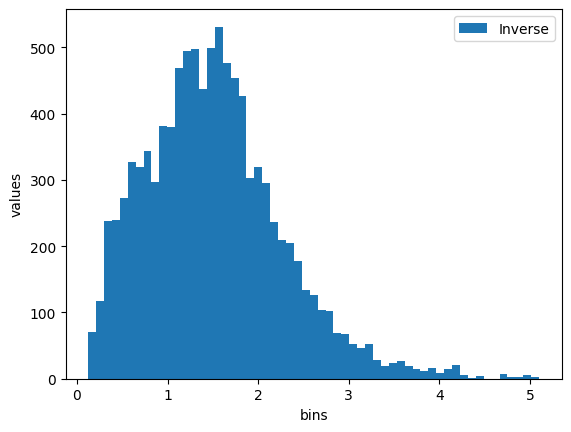

In [7]:
num = np.random.uniform(0,1,N)

y_rand = np.interp(num, x_quantile, y_quantile) #function that retrived the y from discrete point 

plt.hist(y_rand, bins_num(y_rand) , label = "Inverse")
plt.xlabel("bins")
plt.ylabel("values")
plt.legend()
plt.show()

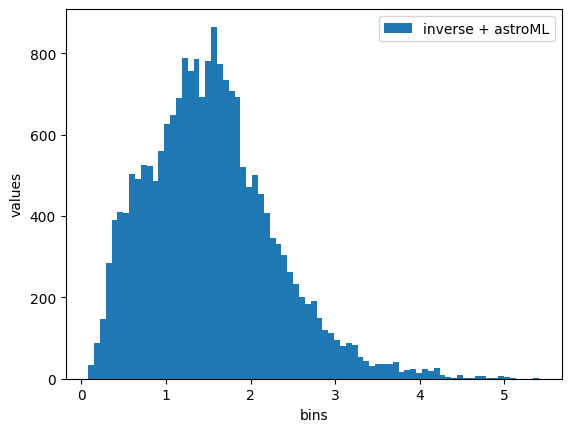

In [8]:
z_augmented_2 = np.concatenate([z, y_rand])

plt.hist(z_augmented_2, bins_num(z_augmented_2), label = "inverse + astroML")
plt.xlabel("bins")
plt.ylabel("values")
plt.legend()
plt.show()

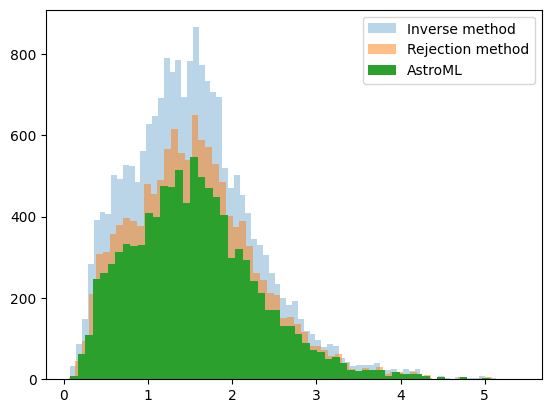

In [9]:
plt.hist(z_augmented_2, bins_num(z_augmented_2), alpha = 0.3, label = "Inverse method") 
plt.hist(z_augmented, bins_num(z_augmented), alpha = 0.5, label = "Rejection method") 
plt.hist(z, bins_num(z), label = "AstroML") 
plt.legend()
plt.show()

**Studio dei residui**

